In [1]:
import os
import sys

# Add project root (one level up from notebooks/) to PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: /Users/alejandromorenogimeno/Desktop/PP/AI-Agent


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.data_generation import generate_order_book_snapshot
from src.microstructure import (
    compute_book_metrics,
    compute_metrics_from_snapshot,
    compute_liquidity_score,
    classify_liquidity_regime,
)
from agents.liquidity_reporter import generate_liquidity_commentary


%matplotlib inline

print("Environment + imports ready.")


Environment + imports ready.


In [3]:
mid_price = 100.0

bid_prices = np.array([99.9, 99.8, 99.7, 99.6, 99.5])
ask_prices = np.array([100.1, 100.2, 100.3, 100.4, 100.5])

np.random.seed(42)
bid_sizes = np.random.randint(10, 50, size=len(bid_prices))
ask_sizes = np.random.randint(10, 50, size=len(ask_prices))

book = pd.DataFrame({
    "side": ["bid"] * len(bid_prices) + ["ask"] * len(ask_prices),
    "price": np.concatenate([bid_prices, ask_prices]),
    "size": np.concatenate([bid_sizes, ask_sizes])
})

book


,side,price,size
0,bid,99.9,48
1,bid,99.8,38
2,bid,99.7,24
3,bid,99.6,17
4,bid,99.5,30
5,ask,100.1,48
6,ask,100.2,28
7,ask,100.3,32
8,ask,100.4,20
9,ask,100.5,20


In [4]:
bids = book[book["side"] == "bid"].sort_values("price", ascending=False)
asks = book[book["side"] == "ask"].sort_values("price", ascending=True)

best_bid = bids["price"].max()
best_ask = asks["price"].min()

spread = best_ask - best_bid
mid = (best_bid + best_ask) / 2

bid_depth = bids["size"].sum()
ask_depth = asks["size"].sum()
total_depth = bid_depth + ask_depth

imbalance = (bid_depth - ask_depth) / total_depth

(best_bid, best_ask, spread, mid, imbalance)


(np.float64(99.9),
 np.float64(100.1),
 np.float64(0.19999999999998863),
 np.float64(100.0),
 np.float64(0.029508196721311476))

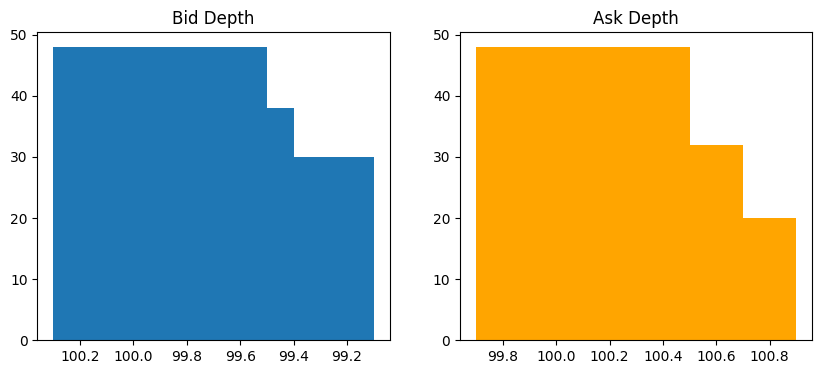

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].bar(bids["price"], bids["size"])
ax[0].invert_xaxis()
ax[0].set_title("Bid Depth")

ax[1].bar(asks["price"], asks["size"], color='orange')
ax[1].set_title("Ask Depth")

plt.show()


In [6]:
def generate_order_book_snapshot(mid=100.0, n_levels=5):
    prices_up = mid + np.arange(1, n_levels+1) * 0.1
    prices_down = mid - np.arange(1, n_levels+1) * 0.1

    bid_prices = prices_down
    ask_prices = prices_up

    bid_sizes = np.random.randint(10, 50, size=n_levels)
    ask_sizes = np.random.randint(10, 50, size=n_levels)

    book = pd.DataFrame({
        "side": ["bid"] * n_levels + ["ask"] * n_levels,
        "price": np.concatenate([bid_prices, ask_prices]),
        "size":  np.concatenate([bid_sizes, ask_sizes])
    })

    return book


In [7]:
spreads = []
mids = []
imbalances = []
liq_scores = []
regimes = []

np.random.seed(0)
mid = 100.0

for t in range(1000):
    mid += np.random.normal(0, 0.02)
    book = generate_order_book_snapshot(mid=mid)
    
    metrics = compute_book_metrics(book)
    spread = metrics["spread"]
    midprice = metrics["mid"]
    imbalance = metrics["imbalance"]
    total_depth = metrics["total_depth"]

    liq_score = compute_liquidity_score(spread, total_depth)
    regime = classify_liquidity_regime(spread, imbalance, liq_score)
    
    spreads.append(spread)
    mids.append(midprice)
    imbalances.append(imbalance)
    liq_scores.append(liq_score)
    regimes.append(regime)


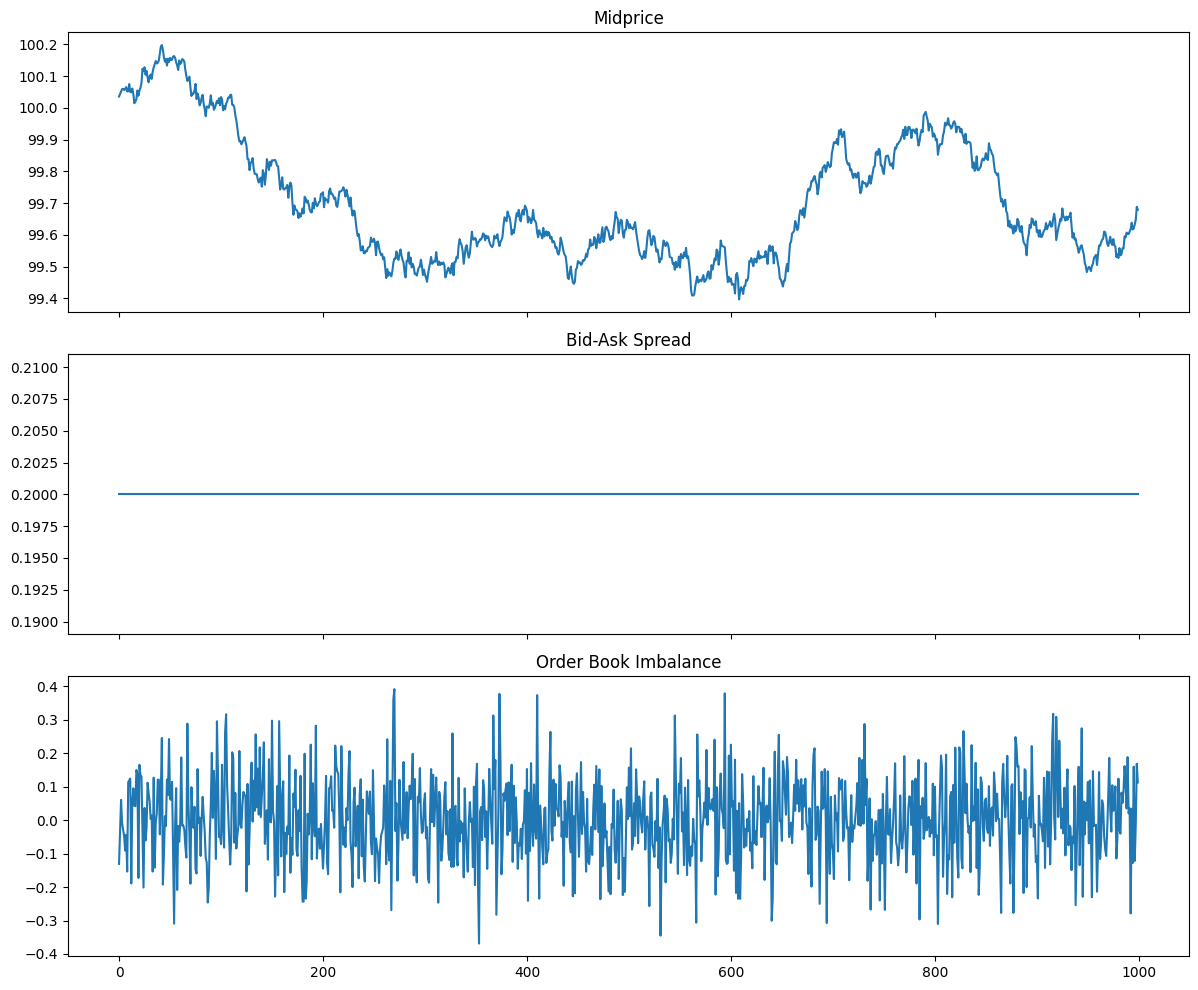

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

ax[0].plot(mids)
ax[0].set_title("Midprice")

ax[1].plot(spreads)
ax[1].set_title("Bid-Ask Spread")

ax[2].plot(imbalances)
ax[2].set_title("Order Book Imbalance")

plt.tight_layout()
plt.show()


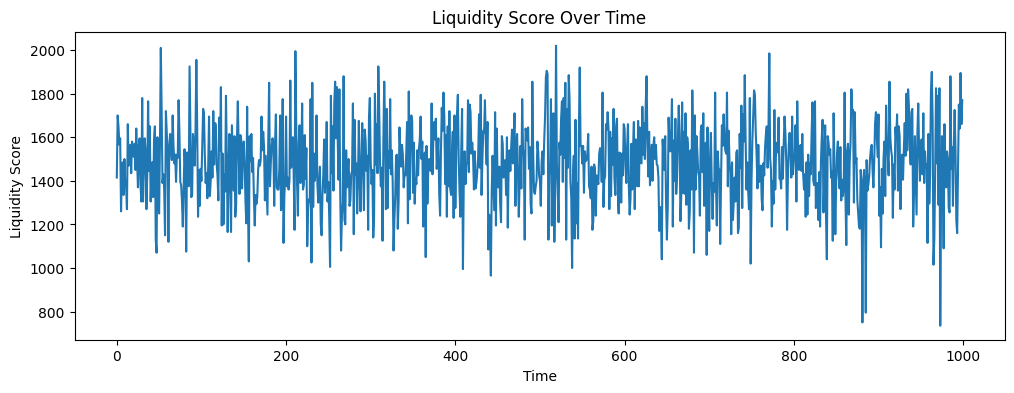

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(liq_scores)
plt.title("Liquidity Score Over Time")
plt.xlabel("Time")
plt.ylabel("Liquidity Score")
plt.show()


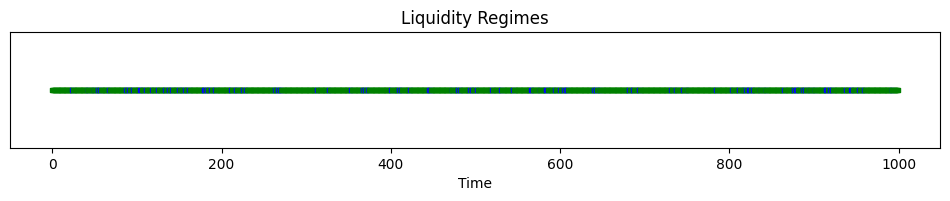

In [10]:
regime_colors = {
    "high_liquidity": "green",
    "normal": "blue",
    "stressed": "red",
    "one_sided_buy": "orange",
    "one_sided_sell": "purple",
}

color_series = [regime_colors[r] for r in regimes]

plt.figure(figsize=(12, 1.5))
plt.scatter(range(len(regimes)), [0]*len(regimes), c=color_series, marker='s', s=10)
plt.yticks([])
plt.xlabel("Time")
plt.title("Liquidity Regimes")
plt.show()


In [11]:
comment = generate_liquidity_commentary(
    spreads=spreads,
    liq_scores=liq_scores,
    imbalances=imbalances,
    regimes=regimes,
    lookback=200,  # last 200 points
)

print(comment)


NameError: name 'generate_liquidity_commentary' is not defined